
# Project for UCD Professional Academy

Data Source: https://www.kaggle.com/datasets/rajeevw/ufcdata?select=data.csv


In [1]:
# importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data into a pandas DataFrame

df = pd.read_csv('data.csv')
df2 = pd.read_csv('raw_fighter_details.csv')
df3 = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [3]:
# create copies that I will manipulate. I want to keep original dataframes in tact.

df_data = df.copy()
df_fighter = df2.copy()
df_fights = df3.copy()

In [4]:
# display the first 5 rows of df_data
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [6]:
# checking data types
df.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [7]:
# more data cleaning will take place later, but I know I'll need date, so creating a datetime column now.
df_data['Date_frmt'] = pd.to_datetime(df['date'])

In [8]:
# verifying that the above is correct.
df.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 144, dtype: object

In [9]:
# check the shape of df_data
df.shape

(6012, 144)

In [10]:
# view summary of df_data
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [11]:
df2.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
0,Tom Aaron,NaN,155 lbs.,NaN,NaN,"Jul 13, 1978",0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Papy Abedi,"5' 11""",185 lbs.,NaN,Southpaw,"Jun 30, 1978",2.80,55%,3.15,48%,3.47,57%,50%,1.3
2,Shamil Abdurakhimov,"6' 3""",235 lbs.,"76""",Orthodox,"Sep 02, 1981",2.45,44%,2.45,58%,1.23,24%,47%,0.2
3,Danny Abbadi,"5' 11""",155 lbs.,NaN,Orthodox,"Jul 03, 1983",3.29,38%,4.41,57%,0.00,0%,77%,0.0
4,Hiroyuki Abe,"5' 6""",145 lbs.,NaN,Orthodox,NaN,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [12]:
df2.shape

(3596, 14)

In [13]:
df2.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


In [14]:
df2.shape

(3596, 14)

In [15]:
df2.describe()

,SLpM,SApM,TD_Avg,Sub_Avg
count,3596.000000,3596.000000,3596.000000,3596.000000
mean,2.279633,2.982948,1.211243,0.636707
std,1.901956,2.814008,1.914020,1.566843
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,1.400000,0.000000,0.000000
50%,2.170000,2.760000,0.510000,0.000000
75%,3.420000,4.002500,1.885000,0.800000
max,19.910000,52.500000,32.140000,21.900000


### EDA

Working through some EDA to try find some interesting insights before I clean the data.

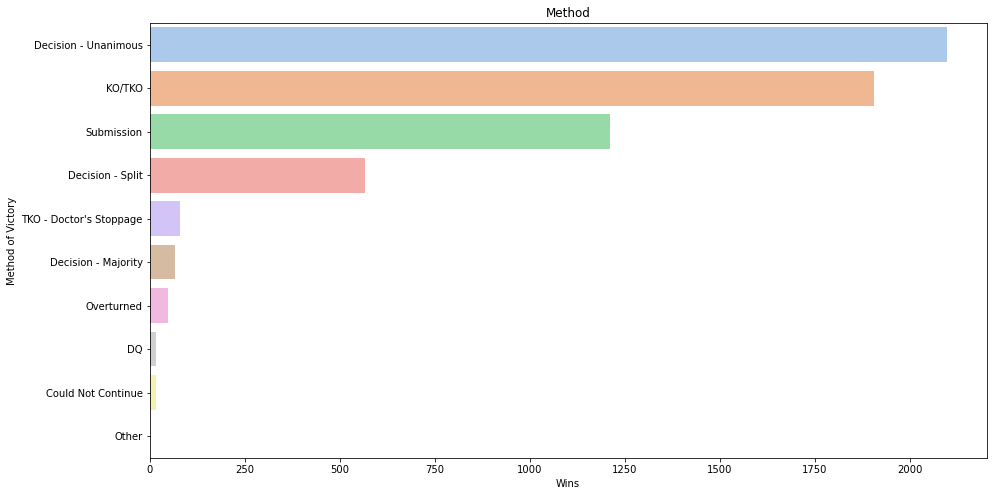

In [16]:
# Method of Victory

values = df3['win_by'].value_counts()
labels = values.index

plt.figure(figsize=(15,8))

sns.barplot(x=values,y=labels, palette='pastel')
plt.xlabel('Wins')
plt.ylabel('Method of Victory')
plt.title('Method')
plt.show()


### Data Cleaning


In [17]:
# check for null values
print("Total nulls in df_data: ", df_data.isna().sum().sum())

Total nulls in df_data:  106494


In [18]:
# check for total null values, set max rows to none to show all data.
pd.set_option('display.max_rows', None)
sort_na = df_data.isna().sum()
sort_na = sort_na[sort_na != 0].sort_values(ascending=False)
sort_na

B_avg_opp_DISTANCE_landed       1427
B_avg_CLINCH_att                1427
B_avg_BODY_att                  1427
B_avg_BODY_landed               1427
B_avg_opp_BODY_att              1427
B_avg_opp_BODY_landed           1427
B_avg_LEG_landed                1427
B_avg_opp_LEG_att               1427
B_avg_opp_LEG_landed            1427
B_avg_DISTANCE_att              1427
B_avg_DISTANCE_landed           1427
B_avg_opp_DISTANCE_att          1427
B_avg_CLINCH_landed             1427
B_avg_opp_HEAD_att              1427
B_avg_opp_CLINCH_att            1427
B_avg_opp_CLINCH_landed         1427
B_avg_GROUND_att                1427
B_avg_GROUND_landed             1427
B_avg_opp_GROUND_att            1427
B_avg_opp_GROUND_landed         1427
B_avg_CTRL_time(seconds)        1427
B_avg_opp_CTRL_time(seconds)    1427
B_total_time_fought(seconds)    1427
B_avg_KD                        1427
B_avg_opp_HEAD_landed           1427
B_avg_LEG_att                   1427
B_avg_HEAD_landed               1427
B

In [19]:
# The nulls in "B_avg_DISTANCE_att" (and all other stats) are null for debuting fighters in the UFC. 
# As these columns represent previous performance in the UFC, they will only populated for a fighter's subsequent fights.
# The reason why the blue corner has more nulls is because champions and higher-ranked fighters are assigned the red corner, thus debutants generally debut in the blue corner.
# We will decide how to deal with these later.
# Example below, see fighter Tai Tuivasa's fights. His first has nulls.
pd.set_option('display.max_columns', False)
df_data[(df_data['R_fighter'] == 'Tai Tuivasa') | (df_data['B_fighter'] == 'Tai Tuivasa')]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,59.234375,30.375000,43.812500,24.796875,70.500000,41.390625,50.234375,30.906250,0.031250,0.000000,2.843750,1.750000,42.500000,16.781250,34.296875,17.937500,5.781250,4.546875,6.125000,3.718750,10.953125,9.046875,3.390625,3.140625,45.875000,20.281250,36.343750,18.687500,11.328125,8.562500,1.437500,1.171875,2.031250,1.531250,6.031250,4.937500,82.453125,89.781250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,2021-03-20
201,Stefan Struve,Tai Tuivasa,Jason Herzog,2020-10-24,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Blue,False,Heavyweight,0.09375,0.375,0.437812,0.517188,0.000,0.625,0.0,0.5,0.0,0.0,76.46875,33.75,68.625,36.59375,78.000,34.78125,81.46875,48.8125,0.0625,0.000,4.6875,3.5,57.0,18.5625,62.59375,31.875,7.5625,5.09375,4.25,3.4375,11.90625,10.09375,1.78125,1.28125,63.750,26.5625,53.6875,24.375,11.65625,7.125,2.875,2.34375,1.0625,0.0625,12.0625,9.875,60.90625,179.5625,597.40625,12,0,3,...,59.780116,34.365727,81.343473,47.921511,66.502104,40.391411,109.166523,73.336073,1.003969,0.285219,2.074002,0.956814,35.103954,13.210841,61.176134,30.738626,14.061064,11.322215,12.635677,11.140892,10.615098,9.832672,7.531662,6.041992,55.110935,30.070628,52.348854,25.664841,3.937342,3.914135,15.124358,10.284497,0.731839,0.380964,13.870261,11.972173,37.292190,298.214305,615.260525,45,0,0,1,4,13,10,0,1,0,1,5,6,0,Orthodox,210.82,213.36,265.0,27.0,32.0,2020-10-24
688,Tai Tuivasa,Serghei Spivac,Steve Perceval,2019-10-05,"Melb

In [20]:
# inspect other nulls

# stances

df_data['B_Stance'].value_counts()

Orthodox       4530
Southpaw       1165
Switch          238
Open Stance       9
Sideways          4
Name: B_Stance, dtype: int64

In [21]:
df_data['R_Stance'].value_counts()

Orthodox       4538
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

<AxesSubplot:xlabel='B_Stance', ylabel='count'>

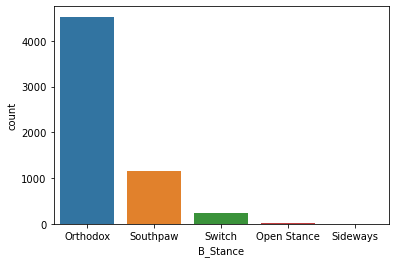

In [22]:
sns.countplot(data=df_data, x='B_Stance')

<AxesSubplot:xlabel='R_Stance', ylabel='count'>

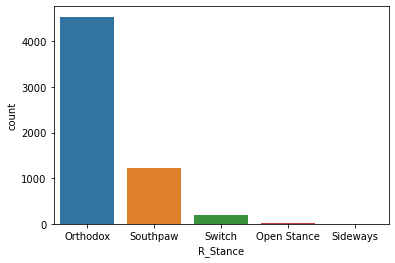

In [23]:
sns.countplot(data=df_data, x='R_Stance')     #easier and quicker 

In [24]:
# set null stances to orthodox. It's statistically the most likely option.

df_data['B_Stance'] = df_data['B_Stance'].fillna('Orthodox')
df_data['R_Stance'] = df_data['R_Stance'].fillna('Orthodox')

In [25]:
# check for total null values, set max rows to none to show all data.

pd.set_option('display.max_rows', None)
sort_na_v2 = df_data.isna().sum()
sort_na_v2 = sort_na_v2[sort_na_v2 != 0].sort_values(ascending=False)
sort_na_v2

B_avg_opp_DISTANCE_att          1427
B_avg_CLINCH_att                1427
B_avg_BODY_att                  1427
B_avg_BODY_landed               1427
B_avg_opp_BODY_att              1427
B_avg_opp_BODY_landed           1427
B_avg_LEG_landed                1427
B_avg_opp_LEG_att               1427
B_avg_opp_LEG_landed            1427
B_avg_DISTANCE_att              1427
B_avg_DISTANCE_landed           1427
B_avg_opp_DISTANCE_landed       1427
B_avg_CLINCH_landed             1427
B_avg_opp_HEAD_att              1427
B_avg_opp_CLINCH_att            1427
B_avg_opp_CLINCH_landed         1427
B_avg_GROUND_att                1427
B_avg_GROUND_landed             1427
B_avg_opp_GROUND_att            1427
B_avg_opp_GROUND_landed         1427
B_avg_CTRL_time(seconds)        1427
B_avg_opp_CTRL_time(seconds)    1427
B_total_time_fought(seconds)    1427
B_avg_KD                        1427
B_avg_opp_HEAD_landed           1427
B_avg_LEG_att                   1427
B_avg_HEAD_landed               1427
B

In [26]:
# inspect other nulls

# missing weights
pd.set_option('display.max_columns', False)
df_data[df_data['R_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5903,Jack Nilson,Saeed Hosseini,Joe Hamilton,1997-05-30,"Augusta, Georgia, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,NaN,NaN,NaN,1997-05-30
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,NaN,NaN,NaN,1994-03-11


In [27]:
pd.set_option('display.max_columns', False)
df_data[df_data['B_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,NaN,170.0,NaN,25.0,1999-01-08
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
5867,Chuck Liddell,Noe Hernandez,Joe Hamilton,1998-05-15,"Mobile, Alabama, USA",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,187.96,193.04,205.0,NaN,28.0,1998-05-15
5894,Alex Hunter,Sam Fulton,Joe Hamilton,1997-07-27,"Birmingham, Alabama, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [28]:
# We will first attempt to set weight to opponents weight, so where R_Weight_lbs is null, set it to B_Weight_lbs.
# This is because fighters should weigh the same as their opponents, unless in edge cases where they miss weight or it's a catchweight or openweight bout. The latter doesn't happen anymore in the UFC and the former is rare.
# We can drop these 2 remaining rows with nulls in weight. These are old fights with insignificant data.
df_data['R_Weight_lbs'] = df_data['R_Weight_lbs'].fillna(df['B_Weight_lbs']) 
df_data['B_Weight_lbs'] = df_data['B_Weight_lbs'].fillna(df['R_Weight_lbs']) 
df_data = df_data.dropna(subset=['R_Weight_lbs', 'B_Weight_lbs'])

In [29]:
pd.set_option('display.max_columns', False)
df_data[df_data['R_Weight_lbs'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt


In [30]:
pd.set_option('display.max_rows', None)
sort_na_v3 = df_data.isna().sum()
sort_na_v3 = sort_na_v3[sort_na_v3 != 0].sort_values(ascending=False)
sort_na_v3                   

B_avg_opp_DISTANCE_att          1426
B_avg_CLINCH_att                1426
B_avg_BODY_att                  1426
B_avg_BODY_landed               1426
B_avg_opp_BODY_att              1426
B_avg_opp_BODY_landed           1426
B_avg_LEG_landed                1426
B_avg_opp_LEG_att               1426
B_avg_opp_LEG_landed            1426
B_avg_DISTANCE_att              1426
B_avg_DISTANCE_landed           1426
B_avg_opp_DISTANCE_landed       1426
B_avg_CLINCH_landed             1426
B_avg_opp_HEAD_att              1426
B_avg_opp_CLINCH_att            1426
B_avg_opp_CLINCH_landed         1426
B_avg_GROUND_att                1426
B_avg_GROUND_landed             1426
B_avg_opp_GROUND_att            1426
B_avg_opp_GROUND_landed         1426
B_avg_CTRL_time(seconds)        1426
B_avg_opp_CTRL_time(seconds)    1426
B_total_time_fought(seconds)    1426
B_avg_KD                        1426
B_avg_opp_HEAD_landed           1426
B_avg_LEG_att                   1426
B_avg_HEAD_landed               1426
B

In [31]:
# missing heights

pd.set_option('display.max_columns', False)
df_data[df_data['B_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4270,Terry Etim,Edward Faaloloto,Leon Roberts,2011-11-05,"Birmingham, England, United Kingdom",Red,False,Lightweight,0.0,1.0,0.39,0.36,0.0,1.0,0.0,0.0,0.0,0.0,43.0,17.0,73.0,27.0,47.0,21.0,75.0,29.0,0.0,0.0,1.0,1.0,26.0,3.0,57.0,17.0,6.0,5.0,13.0,10.0,11.0,9.0,3.0,0.0,31.0,10.0,41.0,9.0,12.0,7.0,16.0,11.0,0.0,0.0,16.0,7.0,11.0,65.0,282.0,1,0,0,...,40.476562,15.007812,52.023438,20.46875,43.757812,17.71875,76.898438,42.09375,0.132812,0.0625,2.617188,1.53125,28.164062,6.25,40.039062,12.1875,2.390625,0.773438,3.6875,2.78125,9.921875,7.984375,8.296875,5.5,36.421875,12.328125,33.507812,6.4375,3.117188,2.539062,3.6875,3.484375,0.9375,0.140625,14.828125,10.546875,69.570312,219.171875,509.09375,18,0,1,0,4,5,3,0,0,0,1,1,3,0,Orthodox,185.42,185.42,155.0,27.0,25.0,2011-11-05
4388,Michael Johnson,Edward Faaloloto,Mark Matheny,2011-06-26,"Pittsburgh, Pennsylvania, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,62.000000,30.000000,67.000000,32.00000,70.000000,38.00000,95.000000,57.00000,1.000000,0.0000,13.000000,3.00000,55.000000,24.00,67.000000,32.0000,3.000000,2.000000,0.0000,0.00000,4.000000,4.000000,0.000000,0.0,44.000000,18.000000,30.000000,7.0000,13.000000,10.000000,4.0000,2.000000,5.0000,2.000000,33.000000,23.000000,74.000000,586.000000,900.00000,3,1,0,1,0,0,1,0,0,0,0,0,0,0,Southpaw,177.80,185.42,155.0,26.0,25.0,2011-06-26
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [32]:
df_data[df_data['R_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,210.0,NaN,NaN,1994-03-11


In [33]:
# We will see if these can be fixed through the fighters dataframe. We will also use this dataframe to fix reach.
# check reach column for red fighter. 
get_r_reach_cm_na = df_data[df_data['R_Reach_cms'].isna()]
get_r_reach_cm_na.groupby(['R_fighter']).size().sort_values(ascending=False)

R_fighter
Don Frye                    9
Dan Severn                  9
Pedro Rizzo                 9
David Abbott                8
Pat Miletich                8
Royce Gracie                8
Oleg Taktarov               6
Frank Shamrock              5
Din Thomas                  5
Jerry Bohlander             5
Ricco Rodriguez             5
Paul Varelans               4
Marco Ruas                  4
Mark Kerr                   4
Maurice Smith               4
Patrick Smith               4
Kevin Randleman             4
Guy Mezger                  4
Gary Goodridge              4
Remco Pardoel               3
Ivan Salaverry              3
Laverne Clark               3
Fabiano Iha                 3
Eugene Jackson              3
Dave Beneteau               3
Tsuyoshi Kohsaka            3
Tor Troeng                  3
Jumabieke Tuerxun           3
Murilo Bustamante           3
Thiago Perpetuo             3
Bruno Silva                 3
Shonie Carter               3
Ian Freeman                 3


In [34]:
# From the above, you can see the large volume of these nulls are mostly from old fighters who competed in the early days.
# This also applies to some of the other columns I previously cleaned up. The UFC didn't document measurements then as closely as they do now.
# Due to the sports changes, we may limit the data to after a certain date. But we can check if the fighter df contains this data to join.
# First, let's see if most nulls disappear after a date limitation.

In [35]:

get_r_reach_cm_na_dfilt = get_r_reach_cm_na[(get_r_reach_cm_na['Date_frmt'] >= '1 Jan 2004')] 
print('Null values in r_reach_cm: ' + str(get_r_reach_cm_na['R_Reach_cms'].isna().sum()) )
print('Null values in r_reach_cm with date filter: ' + str(get_r_reach_cm_na_dfilt['R_Reach_cms'].isna().sum()) )


Null values in r_reach_cm: 405
Null values in r_reach_cm with date filter: 167


In [36]:
# This removes quite a few, but there are still some missing values. 
# Verify that values are missing from the df_fighter DataFrame, as well.

df_fighter[(df_fighter['fighter_name'].isin(get_r_reach_cm_na['R_fighter']))].sort_values(by=['fighter_name'])

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg
2389,Alan Omer,"5' 10""",145 lbs.,NaN,Orthodox,"Sep 14, 1988",3.49,55%,2.21,64%,1.69,42%,66%,0.0
535,Albert Cheng,"5' 11""",170 lbs.,NaN,Orthodox,"Feb 07, 1985",1.00,41%,2.60,71%,0.00,0%,0%,0.0
3306,Alberto Uda,"6' 3""",185 lbs.,NaN,Orthodox,"Aug 08, 1984",1.79,52%,3.49,45%,2.83,50%,66%,0.0
1427,Alex Hunter,"5' 9""",226 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
3067,Alex Soto,"5' 8""",135 lbs.,NaN,Southpaw,"Feb 15, 1984",2.95,25%,5.02,59%,2.82,30%,0%,0.0
830,Alexis Dufresne,"5' 9""",135 lbs.,NaN,Orthodox,"Aug 31, 1990",1.33,27%,3.33,60%,1.50,50%,50%,0.0
284,Amaury Bitetti,"5' 9""",185 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.00,0%,0%,0.0
2703,Andre Roberts,"6' 2""",345 lbs.,NaN,Orthodox,"Feb 24, 1965",0.00,0%,0.00,0%,0.00,0%,0%,0.0
3097,Andreas Stahl,"5' 11""",170 lbs.,NaN,Orthodox,"May 20, 1988",2.83,37%,4.74,57%,1.55,66%,80%,0.0
2925,Andrei Semenov,"6' 0""",185 lbs.,NaN,Orthodox,"Jun 17, 1977",0.78,15%,2.44,60%,1.74,80%,55%,0.4


In [37]:
# We could find another dataset or use web scraping to get this value. 
# However, I assume reach and height will be highly correlated, so if true, we can use that.

df_data[['R_Height_cms', 'R_Reach_cms']].corr(method='pearson')


,R_Height_cms,R_Reach_cms
R_Height_cms,1.000000,0.893139
R_Reach_cms,0.893139,1.000000


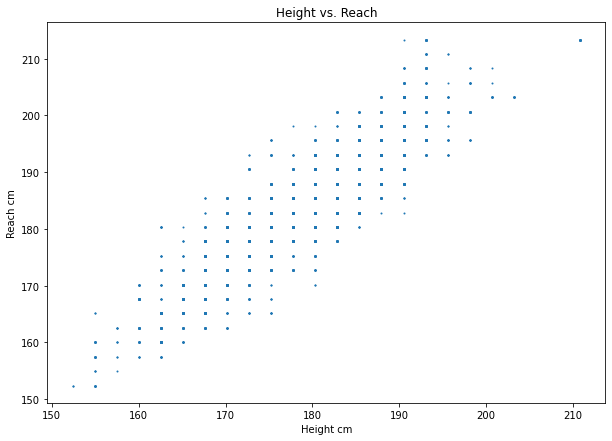

In [38]:
# We can see height and reach are indeed highly correlated, visualised below.
plt.figure(figsize =(10, 7))
plt.title('Height vs. Reach')
plt.xlabel('Height cm')
plt.ylabel('Reach cm')
plt.scatter(df_data['R_Height_cms'], df_data['R_Reach_cms'], s=1)

In [39]:
# Verify this applies to blue corner fighter, too.
df_data[['B_Height_cms', 'B_Reach_cms']].corr(method='pearson')

,B_Height_cms,B_Reach_cms
B_Height_cms,1.000000,0.891119
B_Reach_cms,0.891119,1.000000


In [40]:
# Fix the few missing heights first.

df_data[df_data['B_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4270,Terry Etim,Edward Faaloloto,Leon Roberts,2011-11-05,"Birmingham, England, United Kingdom",Red,False,Lightweight,0.0,1.0,0.39,0.36,0.0,1.0,0.0,0.0,0.0,0.0,43.0,17.0,73.0,27.0,47.0,21.0,75.0,29.0,0.0,0.0,1.0,1.0,26.0,3.0,57.0,17.0,6.0,5.0,13.0,10.0,11.0,9.0,3.0,0.0,31.0,10.0,41.0,9.0,12.0,7.0,16.0,11.0,0.0,0.0,16.0,7.0,11.0,65.0,282.0,1,0,0,...,40.476562,15.007812,52.023438,20.46875,43.757812,17.71875,76.898438,42.09375,0.132812,0.0625,2.617188,1.53125,28.164062,6.25,40.039062,12.1875,2.390625,0.773438,3.6875,2.78125,9.921875,7.984375,8.296875,5.5,36.421875,12.328125,33.507812,6.4375,3.117188,2.539062,3.6875,3.484375,0.9375,0.140625,14.828125,10.546875,69.570312,219.171875,509.09375,18,0,1,0,4,5,3,0,0,0,1,1,3,0,Orthodox,185.42,185.42,155.0,27.0,25.0,2011-11-05
4388,Michael Johnson,Edward Faaloloto,Mark Matheny,2011-06-26,"Pittsburgh, Pennsylvania, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,62.000000,30.000000,67.000000,32.00000,70.000000,38.00000,95.000000,57.00000,1.000000,0.0000,13.000000,3.00000,55.000000,24.00,67.000000,32.0000,3.000000,2.000000,0.0000,0.00000,4.000000,4.000000,0.000000,0.0,44.000000,18.000000,30.000000,7.0000,13.000000,10.000000,4.0000,2.000000,5.0000,2.000000,33.000000,23.000000,74.000000,586.000000,900.00000,3,1,0,1,0,0,1,0,0,0,0,0,0,0,Southpaw,177.80,185.42,155.0,26.0,25.0,2011-06-26
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [41]:
df_data[df_data['R_Height_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,1998-10-16
6004,Frank Hamaker,Thaddeus Luster,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,210.0,NaN,NaN,1994-03-11


In [42]:
# We can use the above information to update height and reach in the fighter data frame. 
# As we know they are heightly correlated, we can check what is the standard ratio between the two: height/reach. It will give us a good estimate.
# We can then join the fighters dataframe to the main df_data dataframe to apply it.
# First a quick clean up of df_fighters

# function that converts feet and inches format to cm.

def convert_to_cm(height):
    if height is np.NaN:
        return height
    elif len(height.split("'")) == 2:
        feet = float(height.split("'")[0])
        inches = int(height.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(height.replace('"','')) * 2.54

In [43]:
# convert all heights to cm. Created a new column, but this could be done in-line. Unsure if I'll need the old columns later
df_fighter['Height_cm'] = df_fighter['Height'].apply(convert_to_cm)

In [44]:
# remove lbs. from weights, convert to numeric.
df_fighter['Weight_lbs'] = (df_fighter['Weight'].str.replace(r'[^0-9]', '', regex=True))
df_fighter['Weight_lbs'] = pd.to_numeric(df_fighter['Weight_lbs'])

In [45]:
# remove " from reach and convert to cm.
df_fighter['Reach_cm'] = pd.to_numeric(df_fighter['Reach'].str.replace(r'[^0-9]', '', regex=True)) * 2.54 

In [46]:
df_fighter.describe()

,SLpM,SApM,TD_Avg,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
count,3596.000000,3596.000000,3596.000000,3596.000000,3333.000000,3522.000000,1684.000000
mean,2.279633,2.982948,1.211243,0.636707,178.593321,173.022147,182.439572
std,1.901956,2.814008,1.914020,1.566843,8.790437,39.946401,10.609492
min,0.000000,0.000000,0.000000,0.000000,152.400000,105.000000,147.320000
25%,0.700000,1.400000,0.000000,0.000000,172.720000,145.000000,175.260000
50%,2.170000,2.760000,0.510000,0.000000,177.800000,170.000000,182.880000
75%,3.420000,4.002500,1.885000,0.800000,185.420000,185.000000,190.500000
max,19.910000,52.500000,32.140000,21.900000,226.060000,770.000000,213.360000


In [47]:
# Weight looks like it might include an extreme outlier. Checking below,we can see a natural outlier in Emmanuel Yarborough.
# There are others, too, like Teila Tuli.
# In the early UFC days, there was no weight limits. These days, the max weight class is heavyweight, and the max limit for that is 265lbs.
# The only time we should see anybody heavier in unseen data is if a heavyweight missed weight - rare.
# Heavyweight asa weight class was originally introduced in 1997. Reform was introduced in May 2001. This is when weight classes will be more standardised.
pd.set_option('display.max_rows', 1000)
df_fighter.sort_values(by=['Weight_lbs'], ascending=False)

,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
3540,Emmanuel Yarborough,"6' 8""",770 lbs.,NaN,Open Stance,"Sep 05, 1960",0.00,0%,0.00,0%,0.0,0%,0%,0.0,203.20,770.0,NaN
3299,Teila Tuli,"6' 0""",430 lbs.,NaN,Orthodox,"Jun 14, 1969",0.00,0%,0.00,0%,0.0,0%,0%,0.0,182.88,430.0,NaN
2613,Thomas Ramirez,"6' 1""",410 lbs.,NaN,Sideways,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,185.42,410.0,NaN
2515,Cory Peterson,"6' 11""",400 lbs.,NaN,Orthodox,NaN,2.17,60%,6.51,40%,0.0,0%,0%,0.0,210.82,400.0,NaN
2004,John Matua,"6' 2""",400 lbs.,NaN,Orthodox,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,187.96,400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,Carl Toomey,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN
3413,Jeremy Wallace,"5' 9""",NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,175.26,NaN,NaN
3488,Karl Willis,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN
3503,Ray Wizard,NaN,NaN,NaN,NaN,NaN,0.00,0%,0.00,0%,0.0,0%,0%,0.0,NaN,NaN,NaN


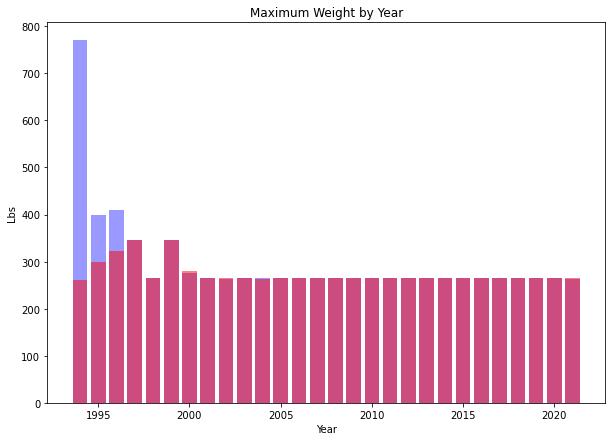

In [48]:

blue = df_data.groupby(df_data.Date_frmt.dt.year)['B_Weight_lbs'].max()
red = df_data.groupby(df_data.Date_frmt.dt.year)['R_Weight_lbs'].max()

plt.figure(figsize =(10, 7))
plt.title('Maximum Weight by Year')
plt.xlabel('Year')
plt.ylabel('Lbs')
plt.bar(blue.index,blue.values,alpha=0.4, color='b')
plt.bar(red.index,red.values, alpha=0.5, color='r')
plt.show()

In [49]:
# Check how many fighters have a reach but no height.

height_check = df_fighter[df_fighter['Height_cm'].isna()]['Reach_cm'].sort_values()
print('Reach with no height: ' + str(height_check[height_check.values > 0].count()) )

Reach with no height: 1


In [50]:
# Check how many fighters have a height but no height.

reach_check = df_fighter[df_fighter['Reach_cm'].isna()]['Height_cm'].sort_values()
print('Height with no reach: ' + str(reach_check[reach_check.values > 0].count()) )

Height with no reach: 1650


In [51]:
# Now we will use the radio of height to reach to full in nulls for both height and reach. 
# There's only one fighter with a reach but no height, so we could drop this. But for this project, I'll fill it in.

hgt_rch_ratio = df_fighter['Height_cm']/df_fighter['Reach_cm']
hgt_rch_ratio = hgt_rch_ratio.mean()
hgt_rch_ratio

0.9763573635628108

In [52]:
# function that populates reach based on height and average ratio between height and reach
def populate_height(reach):
    if reach is np.NaN:
        return reach
    else:
        return reach * hgt_rch_ratio

In [53]:
# function that populates reach based on height and average ratio between height and reach
def populate_reach(height):
    if height is np.NaN:
        return height
    else:
        return height / hgt_rch_ratio

In [54]:
# run function on all nulls in height
df_fighter.loc[df_fighter['Height_cm'].isna(), 'Height_cm'] = df_fighter.loc[df_fighter['Height_cm'].isna(), 'Reach_cm'].apply(populate_height)
df_fighter['Height_cm'] = df_fighter['Height_cm'].round(decimals=1)

In [55]:
# run function on all nulls reach
df_fighter.loc[df_fighter['Reach_cm'].isna(), 'Reach_cm'] = df_fighter.loc[df_fighter['Reach_cm'].isna(), 'Height_cm'].apply(populate_reach)
df_fighter['Reach_cm'] = df_fighter['Reach_cm'].round(decimals=1)

In [56]:
# check remaining height nulls

df_fighter[df_fighter['Height_cm'].isna()]
reach_nulls = str(df_fighter['Reach_cm'].isna().sum())
height_nulls = str(df_fighter['Reach_cm'].isna().sum())
print('There are ' + str(df_fighter.shape[0]) + ' rows. There are ' + reach_nulls + ' remaining nulls in reach and ' + height_nulls + ' remaining nulls in height.')

There are 3596 rows. There are 262 remaining nulls in reach and 262 remaining nulls in height.


In [57]:
# Go back to those

# Age

#df_fighter[df_fighter['DOB'].isna()]

pd.set_option('display.max_rows', None)
sort_na_v4 = df_fighter.isna().sum()
sort_na_v4 = sort_na_v4[sort_na_v4 != 0].sort_values(ascending=False)
sort_na_v4  


Reach         1912
Stance         804
DOB            739
Height         263
Height_cm      262
Reach_cm       262
Weight          74
Weight_lbs      74
dtype: int64

In [58]:
# left join on red fighter to make replacements.
df_data_merge = df_data.merge(df_fighter, left_on='R_fighter', right_on='fighter_name', how='left')

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
R_reach_nulls = df_data_merge[df_data_merge['R_Reach_cms'].isna()]
R_height_nulls = df_data_merge[df_data_merge['R_Height_cms'].isna()]

In [60]:
df_data_merge.R_Reach_cms.fillna(df_data_merge.Reach_cm, inplace=True)
df_data_merge.R_Height_cms.fillna(df_data_merge.Height_cm, inplace=True)

In [61]:
df_data_merge[df_data_merge['R_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
4479,Tom Blackledge,Anthony Perosh,John Sharp,2011-02-26,"Sydney, New South Wales, Australia",Blue,False,LightHeavyweight,0.25,0.5,0.4075,0.475,0.0675,0.25,0.0,0.5,0.0,0.5,43.5,18.5,89.5,34.25,52.0,26.5,121.5,63.25,8.25,0.75,0.75,0.25,36.5,11.75,84.0,29.0,1.0,0.75,3.5,3.25,6.0,6.0,2.0,2.0,32.75,11.25,61.25,18.0,8.5,5.5,11.75,7.75,2.25,1.75,16.5,8.5,85.75,166.25,565.5,6,0,0,3,0,0,3,0,0,0,0,0,0,0,Orthodox,190.5,190.5,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,205.0,38.0,NaN,2011-02-26,Tom Blackledge,NaN,205 lbs.,NaN,Orthodox,NaN,2.91,61%,2.55,46%,0.0,0%,75%,0.0,NaN,205.0,NaN
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
#pd.set_option('display.max_rows', 70)
#df_data_merge.sort_values(by='R_Reach_cms', ascending=True)

In [63]:
# Drop merged columns, unneeded now.
df_data_merge.drop(['fighter_name','Height','Weight','Reach','Stance','DOB','SLpM','Str_Acc','SApM','Str_Def','TD_Avg','TD_Acc','TD_Def','Sub_Avg','Height_cm','Weight_lbs','Reach_cm'],axis=1,inplace=True)

In [64]:
# left join on blue fighter to make replacements.
df_data_merge = df_data_merge.merge(df_fighter, left_on='B_fighter', right_on='fighter_name', how='left')

In [65]:
B_reach_nulls = df_data_merge[df_data_merge['B_Reach_cms'].isna()]
B_height_nulls = df_data_merge[df_data_merge['B_Height_cms'].isna()]
B_reach_nulls

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
92,Ricky Simon,Gaetano Pirrello,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Bantamweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,170.18,NaN,135.0,0.125,0.15625,0.436875,0.494688,0.477187,0.289687,0.03125,0.0,0.03125,0.5,124.9375,53.96875,119.0,53.53125,141.34375,69.9375,126.6875,60.40625,10.65625,5.53125,2.5625,0.5,103.1875,37.0,102.21875,41.09375,13.96875,10.0625,14.34375,10.90625,7.78125,6.90625,2.4375,1.53125,112.21875,42.8125,113.875,50.28125,6.71875,5.625,3.6875,2.15625,6.0,5.53125,1.4375,1.09375,241.09375,25.21875,793.25,16,0,3,0,3,4,2,0,0,1,2,1,0,0,Orthodox,167.64,175.26,135.0,28.0,28.0,2021-01-20,Gaetano Pirrello,"5' 7""",135 lbs.,NaN,Orthodox,"Apr 29, 1992",0.67,42%,1.89,46%,0.00,0%,30%,0.0,170.2,135.0,174.3
102,Mike Davis,Mason Jones,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [66]:
 df_data_merge[df_data_merge['B_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
92,Ricky Simon,Gaetano Pirrello,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Bantamweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,170.18,NaN,135.0,0.125,0.15625,0.436875,0.494688,0.477187,0.289687,0.03125,0.0,0.03125,0.5,124.9375,53.96875,119.0,53.53125,141.34375,69.9375,126.6875,60.40625,10.65625,5.53125,2.5625,0.5,103.1875,37.0,102.21875,41.09375,13.96875,10.0625,14.34375,10.90625,7.78125,6.90625,2.4375,1.53125,112.21875,42.8125,113.875,50.28125,6.71875,5.625,3.6875,2.15625,6.0,5.53125,1.4375,1.09375,241.09375,25.21875,793.25,16,0,3,0,3,4,2,0,0,1,2,1,0,0,Orthodox,167.64,175.26,135.0,28.0,28.0,2021-01-20,Gaetano Pirrello,"5' 7""",135 lbs.,NaN,Orthodox,"Apr 29, 1992",0.67,42%,1.89,46%,0.00,0%,30%,0.0,170.2,135.0,174.3
102,Mike Davis,Mason Jones,Keith Peterson,2021-01-20,"Abu Dhabi, Abu Dhabi, United Arab Emirates",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [67]:
df_data_merge.B_Reach_cms.fillna(df_data_merge.Reach_cm, inplace=True)
df_data_merge.B_Height_cms.fillna(df_data_merge.Height_cm, inplace=True)

In [68]:
df_data_merge[df_data_merge['B_Reach_cms'].isna()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt,fighter_name,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub_Avg,Height_cm,Weight_lbs,Reach_cm
5847,Laverne Clark,Frank Caracci,Tony Mullinax,1999-01-08,"New Orleans, Louisiana, USA",Red,False,Lightweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,180.34,184.70,170.0,NaN,25.0,1999-01-08,Frank Caracci,NaN,NaN,NaN,NaN,NaN,0.0,0%,0.0,0%,0.0,0%,0%,0.0,NaN,NaN,NaN
5859,Tulio Palhares,Adriano Santos,John McCarthy,1998-10-16,"Sao Paulo, Brazil",Red,False,Middleweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [69]:
# Drop merged columns, unneeded now.
df_data_merge.drop(columns=['fighter_name','Height','Weight','Reach','Stance','DOB','SLpM','Str_Acc','SApM','Str_Def','TD_Avg','TD_Acc','TD_Def','Sub_Avg','Height_cm','Weight_lbs','Reach_cm'],axis=1,inplace=True)

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data_merge.isna().sum().sort_values(ascending=False)

B_avg_GROUND_att                1426
B_avg_opp_TD_att                1426
B_avg_HEAD_att                  1426
B_avg_HEAD_landed               1426
B_avg_opp_HEAD_att              1426
B_avg_opp_HEAD_landed           1426
B_avg_BODY_att                  1426
B_avg_BODY_landed               1426
B_avg_opp_BODY_att              1426
B_avg_LEG_att                   1426
B_avg_LEG_landed                1426
B_avg_opp_LEG_att               1426
B_avg_opp_LEG_landed            1426
B_avg_DISTANCE_att              1426
B_avg_DISTANCE_landed           1426
B_avg_opp_DISTANCE_att          1426
B_avg_opp_DISTANCE_landed       1426
B_avg_CLINCH_att                1426
B_avg_CLINCH_landed             1426
B_avg_opp_CLINCH_att            1426
B_avg_opp_CLINCH_landed         1426
B_avg_GROUND_landed             1426
B_avg_opp_GROUND_att            1426
B_avg_opp_GROUND_landed         1426
B_avg_CTRL_time(seconds)        1426
B_avg_opp_CTRL_time(seconds)    1426
B_total_time_fought(seconds)    1426
B

In [71]:
# Check Age
age = df_data_merge[df_data_merge['B_age'].isna()]
age_count = df_fighter[(df_fighter['fighter_name'].isin(age['B_fighter']))]
age_count.groupby(['DOB']).size().sort_values(ascending=False)

Series([], dtype: int64)

In [72]:
# Nothing available in DOB. Drop these rows.
df_data_merge.dropna(subset = ['B_age', 'R_age'], inplace=True)

In [73]:
# Dataframe to be used for ML.
df_final = df_data_merge.copy()

In [74]:
df_final.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,2021-03-20
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000

In [75]:
# Trying to limit on dates.

#df_final = df_final[(df_final.Date_frmt > "1 Jan 2002")]

In [76]:
pd.set_option('display.max_rows', 10)
df_final.sort_values(by=['Date_frmt'], ascending=True)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Date_frmt
6004,Royce Gracie,Jason DeLucia,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,0.000,0.0,0.600000,0.00000,0.000,1.00000,5.000,0.0000,4.00,2.0,5.0000,3.0000,2.000,0.0000,25.0000,20.000,23.000,14.00,1.000,0.0,1.0,1.000,2.000,1.000,2.0000,0.000,2.0000,1.0000,0.0000,0.0000,1.000,1.000,0.000,0.000,4.0000,2.00,2.0000,0.0000,0.0000,0.0000,0.0000,0.00,1.0000,1.000,0.00,0.00,0.00,0.0000,401.00,1,0,1,0,1,1,0,0,0,0,0,0,1,0,Southpaw,180.34,184.70,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Southpaw,185.42,189.90,175.0,24.0,27.0,1994-03-11
5996,Royce Gracie,Patrick Smith,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,True,CatchWeight,0.000,0.0,0.732500,0.36000,0.000,0.00000,0.500,0.0000,0.00,0.0,11.7500,8.0000,2.500,1.2500,15.7500,11.000,2.750,1.50,0.250,0.0,0.5,0.000,9.000,6.250,1.2500,0.500,1.2500,1.2500,0.0000,0.0000,1.500,0.500,1.250,0.750,2.5000,0.75,2.5000,1.2500,1.2500,1.2500,0.0000,0.00,8.0000,6.000,0.00,0.00,0.00,0.0000,46.25,3,0,3,0,3,3,0,0,0,0,0,1,2,0,Orthodox,187.96,192.60,225.0,0.000000,0.000000,0.125000,0.105000,0.500000,0.250000,1.250000,0.00000,0.250000,0.000,1.000000,0.500000,1.750000,0.750000,28.500000,27.500000,4.000000,3.00000

In [77]:
# Dropping columns that aren't needed. 

df_final.drop(columns=['date','Date_frmt','location','Referee','R_fighter','B_fighter'], inplace=True)

# Note: we may limit the dates later. As previously mentioned, pre-2001 had many different rules/variables. 

In [78]:
df_final.head()

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0000,4.500,1.50,0.50,219.50,24.5000,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205.0,1.031250,0.062500,0.576875,0.381250,0.406250,0.11625,0.250000,1.18750,0.37500,0.25,77.562500

In [79]:
df_final.head()

,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Bantamweight,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,Orthodox,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,Middleweight,0.500,0.0,0.660000,0.30500,0.300,0.50000,1.500,0.0000,0.00,0.0,65.5000,35.0000,50.000,16.5000,113.5000,68.500,68.500,29.00,2.500,1.5,0.5,0.500,46.000,20.000,36.0000,7.500,12.0000,8.0000,8.0000,3.0000,7.500,7.000,6.000,6.000,58.0000,30.0,48.0000,15.5000,0.5000,0.5000,0.5000,0.50,7.0000,4.500,1.50,0.50,219.50,24.5000,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,Orthodox,187.96,193.04,205.0,1.031250,0.062500,0.576875,0.381250,0.406250,0.11625,0.250000,1.18750,0.37500,0.25,77.562500

In [80]:
# we want this to be a binary classification. I know there aren't many draws in UFC history, so we'll delete those rows. Verify:

df_final['Winner'].value_counts()

Red     3789
Blue    1921
Draw     107
Name: Winner, dtype: int64

In [81]:
df_final['Winner'].value_counts(normalize=True)

Red     0.651367
Blue    0.330239
Draw    0.018394
Name: Winner, dtype: float64

In [82]:
# As they are less than 2%, we can remove this.
#df_final.drop(df_final.index[df_final['Winner'] == 'Draw'], inplace = True)
#df_final.drop(columns=['B_draw', 'R_draw'], inplace=True)
df_final['Winner'] = df.Winner.map({'Red':0,'Blue':1})

In [83]:
# Check for categorical features.
df_final.dtypes.sort_values()

title_bout                   bool
R_total_title_bouts         int64
B_wins                      int64
B_losses                    int64
B_draw                      int64
                           ...   
B_avg_opp_DISTANCE_att    float64
R_age                     float64
B_Stance                   object
R_Stance                   object
weight_class               object
Length: 139, dtype: object

In [84]:
# Use get-dummys for categorical data - except Winner as that's our target.

df_final = pd.concat([df_final, pd.get_dummies(df_final[['weight_class', 'B_Stance', 'R_Stance']])], axis=1)
df_final.drop(columns=['weight_class', 'B_Stance', 'R_Stance'], inplace=True)

In [85]:
df_final.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,0.0,False,0.000,0.0,0.420000,0.49500,0.330,0.36000,0.500,1.0000,0.00,0.0,50.0000,20.0000,84.000,45.0000,76.5000,41.000,114.000,64.00,1.500,1.0,9.0,6.500,39.500,11.000,63.0000,27.500,7.5000,7.0000,12.0000,9.0000,3.000,2.000,9.000,8.500,35.0000,12.5,43.5000,17.5000,10.5000,4.5000,4.0000,3.00,4.5000,3.000,36.50,24.50,34.00,277.5000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135.0,1.000000,0.000000,0.500000,0.460000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00,34.000000,17.000000,13.00000,6.000000,35.000000,18.000000,16.000000,9.000000,0.000000,0.000000,3.000000,0.000000,32.00000,15.000000,11.000000,5.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0,1,0,0,0,0,0,0,0,0

In [86]:
df_final.isna().sum().sort_values(ascending=False)

B_avg_opp_CTRL_time(seconds)    1302
B_avg_opp_DISTANCE_att          1302
B_avg_opp_HEAD_landed           1302
B_avg_BODY_att                  1302
B_avg_BODY_landed               1302
                                ... 
R_losses                           0
R_draw                             0
R_win_by_Decision_Majority         0
R_win_by_Decision_Split            0
R_Stance_Switch                    0
Length: 159, dtype: int64

In [87]:
# Fill in NAs in stats with median. There is likely a better way of doing this. I'll explore this later.
# However, after looking at the stats, many contain extreme outliers. This is expected. Take B_avg_KD for example.
# The max is 5, wheras the median is 0.016. The 5 came from Marcus Davis vs. Forrest Petz. See: (df_data_merge.sort_values(by=['B_avg_KD'], ascending = False))
# Petz had one previous UFC bout where he scored five knockdowns. The most in the data set for a single fight, and still the most in UFC history, I believe. 
# The fight remains the most lopsided decision in UFC history, with one scorecard of 30-23. (This is incredible, look up MMA scoring for reference)

df_final.describe()

,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
count,5712.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,4515.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.0,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000,5817.00000,5817.000000,5817.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.000000,5179.0

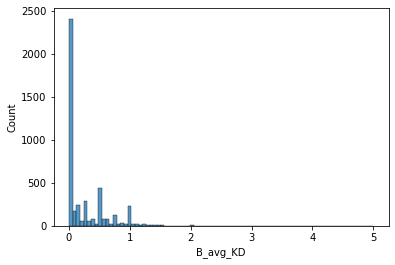

In [88]:

sns.histplot(data=df_final, x="B_avg_KD")
plt.show()

In [89]:
df_final = df_final.fillna(df_final.median())

In [90]:
pd.set_option('display.max_columns', False)
df_final.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,...,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,0.0,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.00000,0.00,0.0,50.0000,20.0000,84.000,45.000000,76.500000,41.000,114.000,64.00,1.500,1.00,9.000,6.500,39.500,11.0000,63.00000,27.500,7.500000,7.0000,12.0000,9.0000,3.000000,2.00000,9.000,8.500,35.0000,12.50,43.500000,17.5000,10.5000,4.5000,4.00000,3.00,4.50000,3.000,36.500000,24.500000,34.000000,277.500000,531.500,4,0,0,1,1,1,1,0,0,...,0.000000,0.000000,0.000000,33.000000,16.000000,12.000000,6.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,54.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135.0,31.0,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.0,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.00000,0.00,0.0,65.5000,35.0000,50.000,16.500000,113.500000,68.500,68.500,29.00,2.500,1.50,0.500,0.500,46.000,20.0000,36.00000,7.500,12.000000,8.0000,8.0000,3.0000,7.500000,7.00000,6.000,6.000,58.0000,30.00,48.000000,15.5000,0.5000,0.5000,0.50000,0.50,7.00000,4.500,1.500000,0.500000,219.500000,24.500000,577.500,4,0,2,0,2,2,0,0,0,...,1.781250,9.656250,8.093750,58.312500,30.437500,63.312500,23.125000,6.968750,3.656250,5.00000,4.125000,12.281250,9.062500,0.843750,0.343750,176.156250,154.687500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185.0,32.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.0,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.149902,0.09375,0.00,0.0,67.2500,30.0000,65.000,27.799561,90.883839,48.500,86.500,44.75,2.000,0.75,2.125,0.750,52.000,18.5625,50.21875,16.500,7.671875,5.2500,7.5625,5.0000,4.558594,3.72998,5.000,4.000,49

In [91]:
df_final.corr()

#pd.set_option("max_rows", None)
#sorted_mtx = cr_mtx.unstack().sort_values(ascending=False)
#sorted_mtx[abs(sorted_mtx.values) > 0.7]

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,...,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
Winner,1.000000,-0.072838,0.020677,-0.031499,0.011386,-0.031017,-0.001635,-0.043258,-0.026327,-0.039963,-0.003110,-0.004387,0.111654,0.112324,0.071107,0.052135,0.091461,0.063659,0.051008,0.011295,0.063612,0.052117,0.053623,0.020324,0.106412,0.107840,0.065818,0.042398,0.104684,0.092675,0.072267,0.047828,0.057783,0.055669,0.050534,0.048687,0.110067,0.112402,0.088570,0.079582,0.033593,0.035581,-0.006764,-0.004156,0.022447,0.029159,-0.050643,-0.039359,0.018745,-0.002701,0.070782,0.035151,-0.059517,0.011516,0.005614,0.026814,0.025823,0.021066,NaN,-0.025520,...,0.028857,0.057012,0.064145,0.083283,0.069494,0.096156,0.119353,0.011650,0.014522,0.052487,0.060143,-0.085081,-0.073300,0.031828,0.052599,-0.063929,0.052560,0.023172,0.108205,-0.028523,-0.032985,0.075147,0.016543,0.070150,0.147284,NaN,0.001121,0.116224,0.058279,0.042119,0.016993,-0.008062,-0.058136,-0.066454,-0.071121,-0.061420,0.148634,0.038892,-0.008726,0.036248,0.028221,-0.040878,-0.030430,-0.008263,-0.022628,-0.031926,-0.009770,0.025595,0.004998,0.021316,0.021676,-0.013830,-0.030921,-0.009208,0.019824,0.030445,-0.014081,0.024885,-0.025003,0.001176
title_bout,-0.072838,1.000000,0.091796,-0.041685,0.070358,-0.082447,0.049230,-0.071493,-0.006201,-0.020769,-0.013347,-0.018137,0.063635,0.084690,-0.004374,-0.028508,0.074011,0.091182,-0.017851,-0.038840,0.015162,0.047209,-0.023303,-0.076846,0.060959,0.085933,-0.005186,-0.036244,0.041731,0.047282,-0.009224,-0.014576,0.052239,0.051324,0.012976,0.004831,0.045953,0.058471,0.009769,-0.004467,0.030215,0.033870,-0.009956,-0.014409,0.088202,0.091182,-0.056182,-0.061203,0.053976,-0.081562,0.055766,0

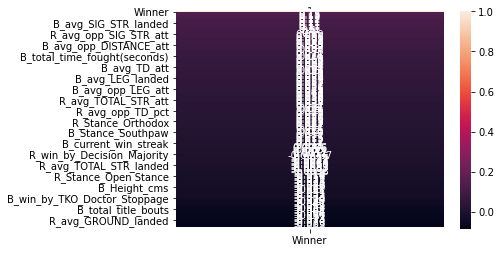

In [92]:
# correlation heat map for features only correlated with win.
corrt =  df_final.corr()[['Winner']]
corrt = corrt[abs(corrt.values) > 0.05]
#corrt
X_ex = df_final[corrt.index]
X = df_final[corrt.index] 
X = X.drop(columns = 'Winner')
sns.heatmap(df_final.corr()[['Winner']].sort_values(by='Winner', ascending=False),annot=True)
plt.show()

In [93]:
#cols = [col for col in df_final.columns if '_att' in col]
#print(cols)

# REMOVE ALL ATTEMNPTS?

# Machine Learning

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
#from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [95]:
# Get X, Y, and train-test split.

y = df_final['Winner'] 
#X = df_final[['R_age', 'B_age']]
X = df_final.drop(columns = 'Winner')
#X = X.drop(columns = cols)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, shuffle = True, stratify = y)

In [96]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable

# Create a KNN classifier with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.6503436426116839


In [97]:
# Try different neighbors
neighbors = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] 
 {1: 1.0, 2: 0.7837954008166774, 3: 0.7827208252740168, 4: 0.7448957661723619, 5: 0.7455405114979583, 6: 0.7171717171717171, 7: 0.7214700193423598, 8: 0.7105093488072212, 9: 0.7115839243498818, 10: 0.7012679991403395, 11: 0.7072856221792392, 12: 0.6971846120782291, 13: 0.7001934235976789, 14: 0.6933161401246508, 15: 0.6935310552331829, 16: 0.6915968192563937, 17: 0.6926713947990544, 18: 0.685364281108962, 19: 0.6890178379540082, 20: 0.6862239415430905, 21: 0.6898774983881367, 22: 0.6840747904577692, 23: 0.6845046206748334, 24: 0.6817107242639158, 25: 0.6776273372018052, 26: 0.6780571674188696, 27: 0.6774124220932731, 28: 0.6750483558994197, 29: 0.6769825918762089, 30: 0.6761229314420804, 31: 0.6784869976359338, 32: 0.6756931012250161, 33: 0.6748334407908876, 34: 0.6737588652482269, 35: 0.6741886954652913, 36: 0.6746185256823555, 37: 0.6

In [98]:
print(str(max(test_accuracies, key=test_accuracies.get)) + ": " + str(max(test_accuracies.values())))

20: 0.6735395189003437


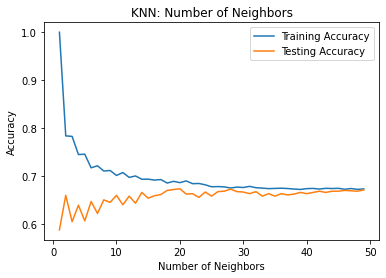

In [99]:
# Plot the above on graph.

plt.title("KNN: Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [100]:
# From the above we could pick 30.
# We know some of our data has a large range, so scaling makes sense. Scale data with Standard Scaler:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
# Try different neighbors
neighbors = np.arange(1, 50)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train_scaled, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
	test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] 
 {1: 1.0, 2: 0.7919621749408984, 3: 0.793036750483559, 4: 0.7519879647539222, 5: 0.7597249086610789, 6: 0.7324306898774984, 7: 0.7371588222652052, 8: 0.7240490006447453, 9: 0.7320008596604342, 10: 0.7165269718461208, 11: 0.7208252740167633, 12: 0.7096496883730926, 13: 0.7079303675048356, 14: 0.7034171502256609, 15: 0.7064259617451106, 16: 0.7021276595744681, 17: 0.7044917257683215, 18: 0.6980442725123576, 19: 0.696969696969697, 20: 0.6980442725123576, 21: 0.6984741027294219, 22: 0.6946056307758436, 23: 0.6946056307758436, 24: 0.6898774983881367, 25: 0.6883730926284117, 26: 0.6866537717601547, 27: 0.6842897055663013, 28: 0.6860090264345583, 29: 0.6866537717601547, 30: 0.6834300451321728, 31: 0.6857941113260262, 32: 0.6851493660004299, 33: 0.688588007736944, 34: 0.685364281108962, 35: 0.6849344508918978, 36: 0.6845046206748334, 37: 0.6868

In [102]:
print(str(max(test_accuracies, key=test_accuracies.get)) + ": " + str(max(test_accuracies.values())))

34: 0.6761168384879725


In [150]:
# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=34)

# Fit the classifier to the data
knn.fit(X_train_scaled, y_train)

# Print the accuracy
print(knn.score(X_test_scaled, y_test))

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [104]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=8, shuffle=True, random_state=43)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=kf)

# Print scores
print(str(cv_scores) + " Mean: " + str(cv_scores.mean()))

[0.6580756  0.67697595 0.67182131 0.69931271 0.66151203 0.66781411
 0.65232358 0.68846816] Mean: 0.672037930810133


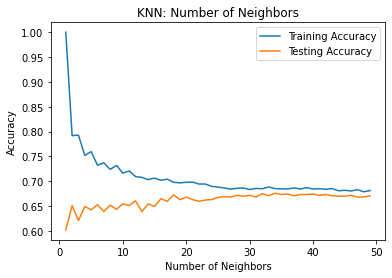

In [105]:
# Plot the above on graph.

plt.title("KNN: Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [192]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]

print(y_pred_probs[:10])

[0.75056739 0.88307108 0.40370626 0.76781233 0.75631006 0.82409504
 0.71779282 0.78588731 0.70668275 0.77644703]


In [193]:
print(y_test[0:10])

2272    1.0
806     1.0
2395    0.0
989     1.0
4099    0.0
3124    0.0
883     0.0
5091    0.0
2422    1.0
1265    1.0
Name: Winner, dtype: float64


In [194]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.6663494925213674
[[278 502]
 [ 60 324]]
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50       780
         1.0       0.39      0.84      0.54       384

    accuracy                           0.52      1164
   macro avg       0.61      0.60      0.52      1164
weighted avg       0.68      0.52      0.51      1164



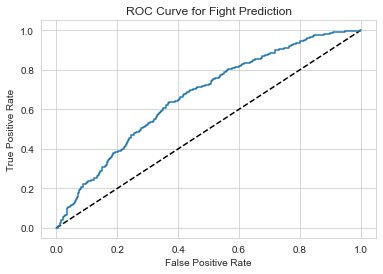

In [195]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fight Prediction')
plt.show()

In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(100,1000),
              'max_depth': randint(5,75),
              'criterion' :['gini', 'entropy']}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=8, 
                                 cv=5,
                                 n_jobs=-1)

# Fit the random search object to the data
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=8,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B8CFA6850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B8CC10490>})

In [111]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 24, 'n_estimators': 472}


In [206]:
#max_features='sqrt', min_samples_leaf=0.2,
model_rf = RandomForestClassifier(n_estimators=472, max_depth=24, oob_score=True, random_state=43, criterion='gini')

In [207]:
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=24, n_estimators=472, oob_score=True,
                       random_state=43)

In [208]:
model_rf.oob_score_

0.6761229314420804

In [209]:
y_preds2 = model_rf.predict(X_test_scaled)
y_pred_test2 = (model_rf.predict_proba(X_test_scaled)[:,1] >= 0.53165).astype(bool) # set threshold as 0.3

In [210]:
accuracy_score(y_test, y_preds2)

0.6743986254295533

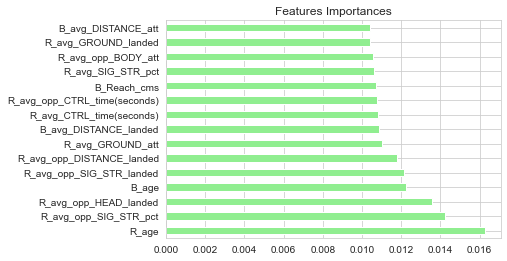

In [211]:
# Important features

importances = pd.Series(data=model_rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values(ascending=False).head(15)

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [212]:
cm = confusion_matrix(y_test, y_preds2)
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

         0.0       0.68      0.96      0.80       780
         1.0       0.54      0.09      0.15       384

    accuracy                           0.67      1164
   macro avg       0.61      0.53      0.47      1164
weighted avg       0.64      0.67      0.58      1164



[Text(0, 0.5, 'Red'), Text(0, 1.5, 'Blue')]

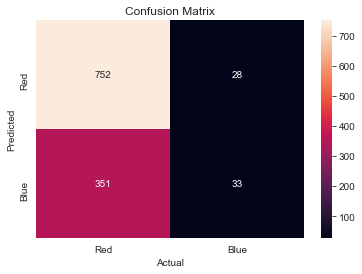

In [213]:
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Red', 'Blue'])
ax.yaxis.set_ticklabels(['Red', 'Blue'])

In [214]:
# Gradiant Boosting

from sklearn.ensemble import GradientBoostingClassifier

clf_gbm = GradientBoostingClassifier(n_estimators=600, learning_rate=0.01, random_state=500)
clf_gbm.fit(X_train_scaled, y_train)

# Calculate the predictions on the test set
pred = clf_gbm.predict(X_test_scaled)

# Evaluate the performance based on the accuracy
acc = accuracy_score(y_test, pred)
print('Accuracy: {:.3f}'.format(acc))

# Get and show the Confusion Matrix
cm = confusion_matrix(y_test, pred)
print(cm)

KeyboardInterrupt: 

In [128]:
param_dist = {'n_estimators': randint(100,1000),
              'learning_rate': [0.005, 0.01,0.02]}

# Create a random forest classifier
gb = GradientBoostingClassifier()

# Use random search to find the best hyperparameters
rand_gb = RandomizedSearchCV(gb, 
                                 param_distributions = param_dist, 
                                 n_iter=8, 
                                 cv=5,
                                 n_jobs=-1)

# Fit the random search object to the data
rand_gb.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=8,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.005, 0.01, 0.02],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B853E3400>})

In [131]:
# Create a variable for the best model
best_gb = rand_gb.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_gb.best_params_)

Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 603}


In [222]:
# Instantiate the individual models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf_knn = KNeighborsClassifier(n_neighbors=34)
clf_dt = RandomForestClassifier(n_estimators=472, max_depth=24, oob_score=True, random_state=43, criterion='gini')
clf_lr = LogisticRegression(max_iter=1000)

# Create and fit the voting classifier
clf_vote = VotingClassifier(
    estimators=[('knn', clf_knn), ('dt', clf_dt), ('lr', clf_lr)]
)
clf_vote.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=34)),
                             ('dt',
                              RandomForestClassifier(max_depth=24,
                                                     n_estimators=472,
                                                     oob_score=True,
                                                     random_state=43)),
                             ('lr', LogisticRegression(max_iter=1000))])

In [223]:
from sklearn.metrics import f1_score
# Calculate the predictions using the voting classifier
pred_vote = clf_vote.predict(X_test_scaled)

# Calculate the classification report
report = classification_report(y_test, pred_vote)
print(report)
acc = accuracy_score(y_test, pred_vote)
print('Accuracy: {:.3f}'.format(acc))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.80       780
         1.0       0.62      0.10      0.18       384

    accuracy                           0.68      1164
   macro avg       0.65      0.54      0.49      1164
weighted avg       0.66      0.68      0.60      1164

Accuracy: 0.683


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\rpallin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

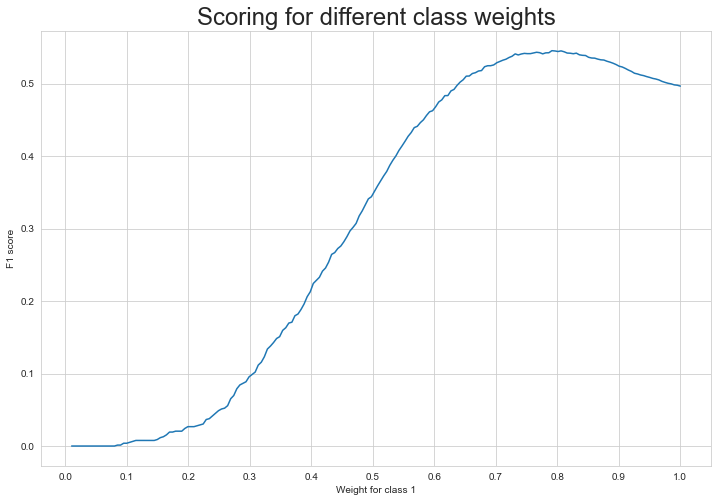

In [219]:
# With a low F1 score for class 2, I researched potential reasons. I found an article that said balancing the classes helps.
# As Red wins far more than Blue, I attempted this:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_scaled, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [224]:
# Instantiate the individual models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf_knn = KNeighborsClassifier(n_neighbors=34)
clf_dt = RandomForestClassifier(n_estimators=472, max_depth=24, oob_score=True, random_state=43, criterion='gini')
clf_lr = LogisticRegression(max_iter=1000, class_weight={0: 0.208945, 1: 0.791055}, solver='newton-cg')

# Create and fit the voting classifier
clf_vote = VotingClassifier(
    estimators=[('knn', clf_knn), ('dt', clf_dt), ('lr', clf_lr)]
)
clf_vote.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=34)),
                             ('dt',
                              RandomForestClassifier(max_depth=24,
                                                     n_estimators=472,
                                                     oob_score=True,
                                                     random_state=43)),
                             ('lr',
                              LogisticRegression(class_weight={0: 0.208945,
                                                               1: 0.791055},
                                                 max_iter=1000,
                                                 solver='newton-cg'))])

In [ ]:
# Try date split
# Scraping
#Done, do report

In [225]:
from sklearn.metrics import f1_score
# Calculate the predictions using the voting classifier
pred_vote = clf_vote.predict(X_test_scaled)

# Calculate the classification report
report = classification_report(y_test, pred_vote)
print(report)
acc = accuracy_score(y_test, pred_vote)
print('Accuracy: {:.3f}'.format(acc))

              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80       780
         1.0       0.57      0.16      0.25       384

    accuracy                           0.68      1164
   macro avg       0.63      0.55      0.52      1164
weighted avg       0.65      0.68      0.62      1164

Accuracy: 0.683
